<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/project/train/train10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd

train10 = pd.read_csv(r'/content/train_data10.csv')


In [146]:
train10['Target']=train10['Target'].replace(['Others'],'Invalid')


In [147]:
train10['Target'].unique()

array(['Invalid', 'Issue', 'Analysis', 'Facts', 'Conclusion',
       'Rule/Law/Holding'], dtype=object)

In [148]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Train 10

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train10['Sentence'])
print(X_tfidf.shape)

(3476, 6403)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=Invalid, n=1769 (16.667%)
Class=Issue, n=1769 (16.667%)
Class=Analysis, n=1769 (16.667%)
Class=Facts, n=1769 (16.667%)
Class=Conclusion, n=1769 (16.667%)
Class=Rule/Law/Holding, n=1769 (16.667%)


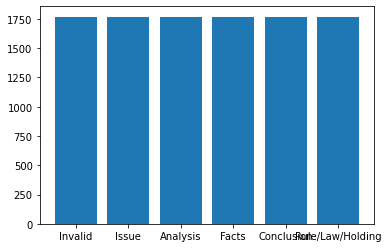

In [150]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf, train10['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.9218087611869995
                  precision    recall  f1-score   support

        Analysis       0.90      0.94      0.92       367
      Conclusion       0.94      0.98      0.96       361
           Facts       0.90      0.73      0.80       329
         Invalid       0.86      0.88      0.87       339
           Issue       0.97      0.98      0.98       377
Rule/Law/Holding       0.95      1.00      0.97       350

        accuracy                           0.92      2123
       macro avg       0.92      0.92      0.92      2123
    weighted avg       0.92      0.92      0.92      2123



In [152]:
test = pd.read_csv(r'/content/test_data.csv')
test.head()

,Unnamed: 0,Sentence,Target
0,2173,Darden Sr. testified â€œI saw he was staggerin...,Facts
1,466,Additional moral justification may have been d...,Analysis
2,525,"85, 22 S.W. 140, wherein the accused was actin...",Rule/Law/Holding
3,2199,Under a proper instruction from the court on m...,Facts
4,79,He is eligible for leaves to renew contacts wi...,Facts


In [153]:
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [154]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
test['Sentence'] = test['Sentence'].apply(lambda x: TextBlob(x).words)
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [155]:
del test['Target']
unlabel_1 = test.loc[:100]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = test.loc[101:200]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = test.loc[201:300]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = test.loc[301:400]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = test.loc[401:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 101
length of unlabel_2 100
length of unlabel_3 100
length of unlabel_4 100
length of unlabel_5 120


In [156]:
x_un1 = tfidf_vect.transform(unlabel_1['Sentence'])
pred_unlabel_1 = sgd.predict(x_un1)
unlabel_1['Predicted']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Sentence,Predicted
0,2173,darden sr testified âœi saw staggering â prett...,Facts
1,466,additional moral justification may due complai...,Issue
2,525,85 22 sw 140 wherein accused acting upon advic...,Invalid
3,2199,proper instruction court murder malice murder ...,Facts
4,79,eligible leaf renew contact family,Facts


In [157]:
unlabel_1 = unlabel_1.rename(columns={'Predicted':'Target'})
unlabel_1.head()


,Unnamed: 0,Sentence,Target
0,2173,darden sr testified âœi saw staggering â prett...,Facts
1,466,additional moral justification may due complai...,Issue
2,525,85 22 sw 140 wherein accused acting upon advic...,Invalid
3,2199,proper instruction court murder malice murder ...,Facts
4,79,eligible leaf renew contact family,Facts


In [158]:
frame10_1 = [train10,unlabel_1]
train10_1 = pd.concat(frame10_1)
len(train10_1)

3577

In [159]:
x_train10_1 = tfidf_vect.transform(train10_1['Sentence'])
X, y = oversample.fit_resample(x_train10_1, train10_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9198823961778758
                  precision    recall  f1-score   support

        Analysis       0.90      0.93      0.91       482
      Conclusion       0.96      0.99      0.97       450
           Facts       0.88      0.74      0.80       436
         Invalid       0.86      0.87      0.86       451
           Issue       0.97      0.98      0.98       457
Rule/Law/Holding       0.95      1.00      0.97       445

        accuracy                           0.92      2721
       macro avg       0.92      0.92      0.92      2721
    weighted avg       0.92      0.92      0.92      2721



In [160]:
x_un2 = tfidf_vect.transform(unlabel_2['Sentence'])
pred_unlabel_2 = sgd.predict(x_un2)
unlabel_2['Target']=pred_unlabel_2
frame10_2 = [train10_1,unlabel_2]
train10_2 = pd.concat(frame10_2)

x_train10_2 = tfidf_vect.transform(train10_2['Sentence'])
X, y = oversample.fit_resample(x_train10_2, train10_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9195746095048188
                  precision    recall  f1-score   support

        Analysis       0.89      0.91      0.90       524
      Conclusion       0.95      0.98      0.97       495
           Facts       0.88      0.76      0.82       492
         Invalid       0.87      0.89      0.88       499
           Issue       0.96      0.97      0.97       524
Rule/Law/Holding       0.95      1.00      0.97       475

        accuracy                           0.92      3009
       macro avg       0.92      0.92      0.92      3009
    weighted avg       0.92      0.92      0.92      3009



In [161]:
x_un3 = tfidf_vect.transform(unlabel_3['Sentence'])
pred_unlabel_3 = sgd.predict(x_un3)
unlabel_3['Target']=pred_unlabel_3
frame10_3 = [train10_2,unlabel_3]
train10_3 = pd.concat(frame10_3)

x_train10_3 = tfidf_vect.transform(train10_3['Sentence'])
X, y = oversample.fit_resample(x_train10_3, train10_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9232111692844677
                  precision    recall  f1-score   support

        Analysis       0.89      0.93      0.91       509
      Conclusion       0.95      0.98      0.97       454
           Facts       0.93      0.75      0.83       464
         Invalid       0.86      0.89      0.87       465
           Issue       0.96      0.99      0.98       500
Rule/Law/Holding       0.95      0.99      0.97       473

        accuracy                           0.92      2865
       macro avg       0.92      0.92      0.92      2865
    weighted avg       0.92      0.92      0.92      2865



In [162]:
x_un4 = tfidf_vect.transform(unlabel_4['Sentence'])
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
frame10_4 = [train10_3,unlabel_4]
train10_4 = pd.concat(frame10_4)

x_train10_4 = tfidf_vect.transform(train10_4['Sentence'])
X, y = oversample.fit_resample(x_train10_4, train10_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.18,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9247159090909091
                  precision    recall  f1-score   support

        Analysis       0.88      0.94      0.91       364
      Conclusion       0.97      0.98      0.97       329
           Facts       0.92      0.77      0.84       372
         Invalid       0.88      0.88      0.88       345
           Issue       0.97      0.99      0.98       363
Rule/Law/Holding       0.94      1.00      0.97       339

        accuracy                           0.92      2112
       macro avg       0.93      0.93      0.92      2112
    weighted avg       0.92      0.92      0.92      2112



In [163]:
x_un5 = tfidf_vect.transform(unlabel_5['Sentence'])
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
frame10_5 = [train10_4,unlabel_5]
train10_5 = pd.concat(frame10_5)

x_train10_5 = tfidf_vect.transform(train10_5['Sentence'])
X, y = oversample.fit_resample(x_train10_5, train10_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.19,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9238221047996478
                  precision    recall  f1-score   support

        Analysis       0.89      0.93      0.91       386
      Conclusion       0.96      0.98      0.97       377
           Facts       0.90      0.75      0.82       366
         Invalid       0.87      0.88      0.88       394
           Issue       0.97      1.00      0.98       382
Rule/Law/Holding       0.95      1.00      0.97       366

        accuracy                           0.92      2271
       macro avg       0.92      0.92      0.92      2271
    weighted avg       0.92      0.92      0.92      2271

